# Physical implementation of a qubit device

In [14]:
%matplotlib inline
import numpy as np
from qutip import *
from qutip.qip.device.processor import Processor
from qutip.qip.circuit_latex import _latex_compile

from qutip.qip.device import spinchain

### Circuit Setup

In [15]:
# Number of qubits in the system
N = 2

# Input state
input_states = ["0"]*N

# A list of integers for the dimension of each composite system.
dims = [3]*N
print(dims)

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, input_states = input_states, dims = dims, reverse_states = False)

qc.add_gate("RX", 0, None, -np.pi/2, r"-\pi/2")

[3, 3]


In [16]:
U_ideal = gate_sequence_product(qc.propagators())

U_ideal

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j         0.        +0.j         0.        +0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        +0.j
  0.        +0.70710678j]
 [0.        +0.70710678j 0.        +0.j         0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.70710678j 0.        +0.j
  0.70710678+0.j        ]]

### Processor
A simulator of a quantum device based on the QuTiP solver
:func:`qutip.mesolve`.
It is defined by the available driving Hamiltonian and
the decoherence time for each component systems.
The processor can simulate the evolution under the given
control pulses. Noisy evolution is supported by
:class:`qutip.qip.Noise` and can be added to the processor.

In [17]:
p1 = CircularSpinChain(N, correct_global_phase=True)

U_list = p1.run(qc)

U_physical = gate_sequence_product(U_list)

U_physical.tidyup(atol=1e-5)

NameError: name 'CircularSpinChain' is not defined

In [7]:
p1.qc2.gates

NameError: name 'p1' is not defined

In [6]:
p1.tlist

NameError: name 'p1' is not defined

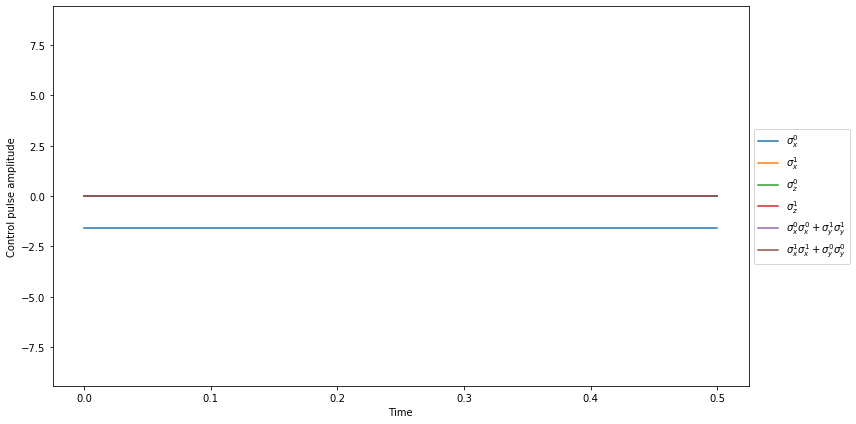

In [153]:
p1.plot_pulses();

In [8]:
p1 = Processor(N)

p1.run(qc)

NotImplementedError: Use the function in the sub-class

In [122]:
import qutip.ipynbtools
qutip.ipynbtools.version_table()

Software,Version
QuTiP,4.5.0.dev0+9f718cc3
Numpy,1.17.3
SciPy,1.3.2
matplotlib,3.1.2
Cython,0.29.14
Number of CPUs,6
BLAS Info,Generic
IPython,7.12.0
Python,"3.8.1 | packaged by conda-forge | (default, Jan 29 2020, 15:06:10) [Clang 9.0.1 ]"
OS,posix [darwin]
